In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
pdf = pd.read_csv("issues.csv", parse_dates=['created_at', 'closed_at'])

In [5]:
pdf.columns

Index(['assignee', 'assignee.avatar_url', 'assignee.events_url',
       'assignee.followers_url', 'assignee.following_url',
       'assignee.gists_url', 'assignee.gravatar_id', 'assignee.html_url',
       'assignee.id', 'assignee.login', 'assignee.node_id',
       'assignee.organizations_url', 'assignee.received_events_url',
       'assignee.repos_url', 'assignee.site_admin', 'assignee.starred_url',
       'assignee.subscriptions_url', 'assignee.type', 'assignee.url',
       'assignees', 'author_association', 'body', 'closed_at', 'comments',
       'comments_url', 'created_at', 'events_url', 'html_url', 'id', 'labels',
       'labels_url', 'locked', 'milestone', 'milestone.closed_at',
       'milestone.closed_issues', 'milestone.created_at',
       'milestone.creator.avatar_url', 'milestone.creator.events_url',
       'milestone.creator.followers_url', 'milestone.creator.following_url',
       'milestone.creator.gists_url', 'milestone.creator.gravatar_id',
       'milestone.creator.htm

https://developer.github.com/v3/pulls/#list-pull-requests
* "state": "open",
* "created_at": "2011-01-26T19:01:12Z",
* "closed_at": "2011-01-26T19:01:12Z",
* "merged_at": "2011-01-26T19:01:12Z",

In [17]:
psub = pdf[['user.login', 'id', 'state', 'created_at', 'closed_at', 'author_association']].copy()

In [18]:
psub.columns

Index(['user.login', 'id', 'state', 'created_at', 'closed_at',
       'author_association'],
      dtype='object')

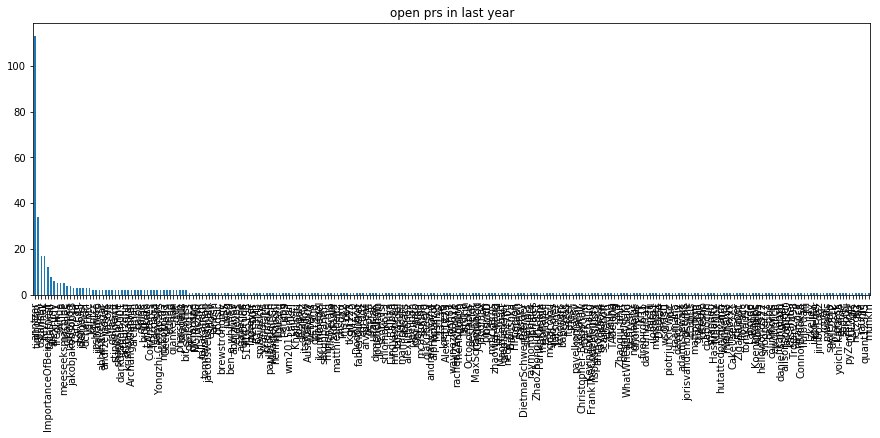

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title("open prs in last year")
_ = psub[(psub['created_at']>'2018-07-17') & 
         psub['state'].str.match('open')]['user.login'].value_counts().plot.bar(ax=ax)

In [26]:
psub[(psub['created_at']>'2018-07-17') & 
         psub['state'].str.match('open')]['user.login'].value_counts()

anntzer                    113
timhoffm                    34
dstansby                    17
jklymak                     17
ImportanceOfBeingErnest     12
                          ... 
alisonspencer                1
netzo92                      1
fk3                          1
raunM                        1
munkm                        1
Name: user.login, Length: 259, dtype: int64

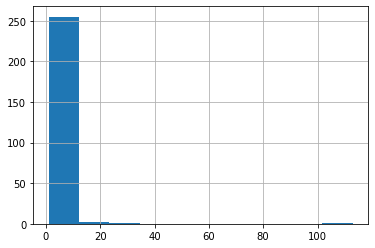

In [27]:
psub[(psub['created_at']>'2018-07-17') & 
         psub['state'].str.match('open')]['user.login'].value_counts().hist()

In [28]:
#drop bot
psub = psub[~psub['user.login'].str.match('meeseeksmachine')]

In [29]:
psub['close_rate'] = psub['closed_at'] - psub['created_at']

In [30]:
psub[['close_rate']].describe()

,close_rate
count,4531
mean,23 days 11:35:24.829176
std,68 days 02:57:58.263685
min,0 days 00:00:07
25%,0 days 05:19:28
50%,1 days 04:12:08
75%,8 days 22:31:51.500000
max,647 days 13:26:38


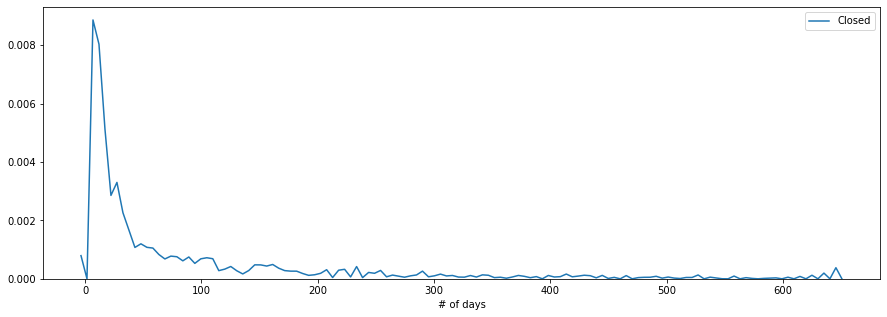

In [33]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,5))
_ = sns.distplot(psub['close_rate'].dropna(how='all').dt.days, ax=ax, hist=False, label="Closed")
_ = ax.legend()
_ = ax.set_xlabel("# of days")

In [34]:
p2019 = psub[psub['created_at']>'2018-07-1'].copy()

In [35]:
ppr = p2019.groupby([pd.Grouper(key='created_at', freq='m'), 'state']).count()

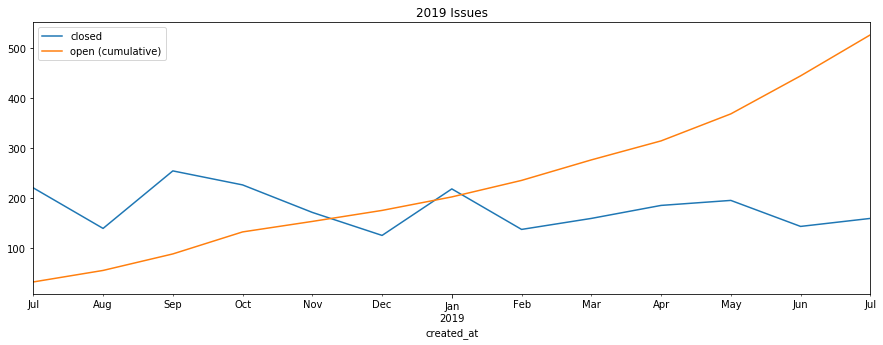

In [37]:
fig, ax = plt.subplots(figsize=(15,5))
_ = ax.set_title("2019 Issues")
_ = ppr['closed_at'].unstack()['closed'].plot(ax=ax, label='closed')
_ = ppr['user.login'].unstack()['open'].cumsum().plot(ax=ax, label='open (cumulative)') 
_ = ax.legend()

In [38]:
pre2019 = psub[(psub['created_at']<='2018-07-1') & psub['state'].str.match('open')]['state'].count()

In [39]:
opened = p2019.groupby(pd.Grouper(key='created_at', freq='M'))['created_at'].count()

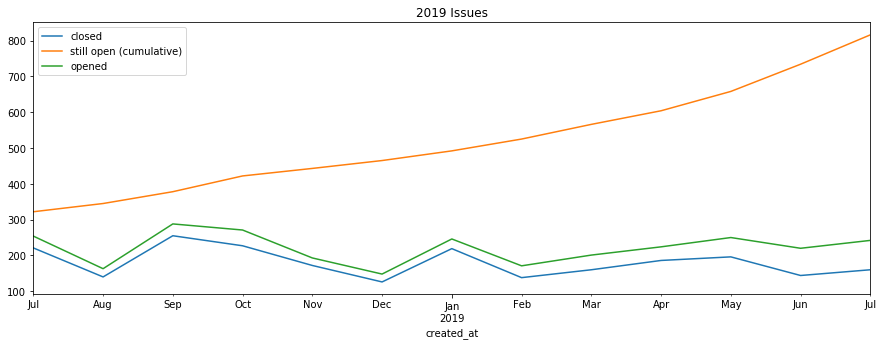

In [41]:
fig, ax = plt.subplots(figsize=(15,5))
_ = ax.set_title("2019 Issues")
_ = ppr['closed_at'].unstack()['closed'].plot(ax=ax, label='closed')
_ = (ppr['user.login'].unstack()['open'].cumsum() + pre2019).plot(ax=ax, label='still open (cumulative)')
_ = opened.plot(ax=ax, label='opened')
    
_ = ax.legend()

In [42]:
psub.columns

Index(['user.login', 'id', 'state', 'created_at', 'closed_at',
       'author_association', 'close_rate', 'close_wno_merge_rate'],
      dtype='object')

In [43]:
pdr = psub.groupby([pd.Grouper(key='created_at', freq='m'), 'state']).count()
all_opened = psub.groupby(pd.Grouper(key='created_at', freq='m'))['created_at'].count()

/home/hannah/miniconda3/envs/mpl/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


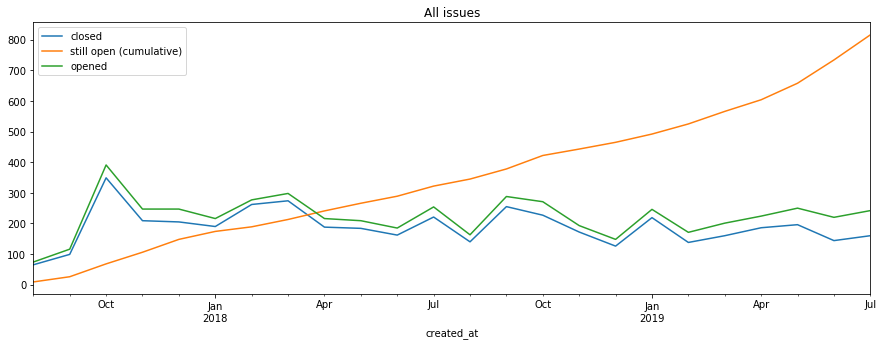

In [44]:
fig, ax = plt.subplots(figsize=(15,5))
_ = ax.set_title("All issues")
_ = pdr['closed_at'].unstack()['closed'].plot(ax=ax, label='closed')
_ = pdr['user.login'].unstack()['open'].cumsum().plot(ax=ax, label='still open (cumulative)') 
_ = all_opened.plot(label = "opened")
_ = ax.legend()

In [45]:
pdf[pdf['user.login'].str.match('meeseeksmachine')][['created_at','closed_at',]].count()

created_at    553
closed_at     548
dtype: int64

In [23]:
523/526, 515/526

(0.9942965779467681, 0.9790874524714829)

/home/hannah/miniconda3/envs/mpl/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


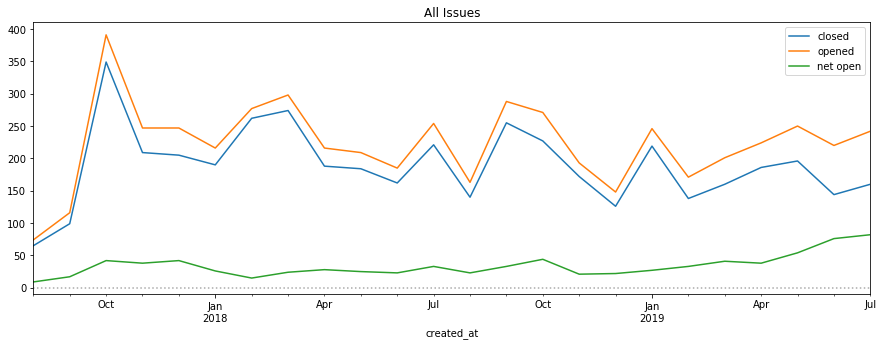

In [54]:
fig, ax = plt.subplots(figsize=(15,5))
_ = ax.set_title("All Issues")
_ = pdr['closed_at'].unstack()['closed'].plot(ax=ax, label='closed')
_ = all_opened.plot(label = "opened")
_ = (all_opened-pdr['closed_at'].unstack()['closed']).plot(ax=ax, label='net open')
_ = ax.set_label("# issues")
_ = ax.legend()
_ = ax.axhline(0, linestyle=':', color='darkgray')

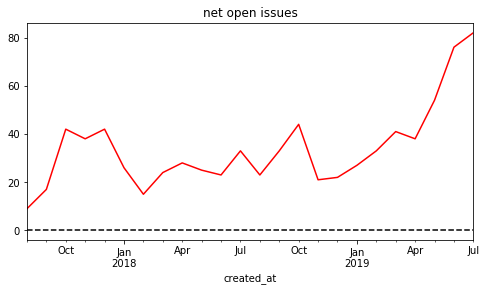

In [55]:
fig, ax = plt.subplots(figsize=(8,4))
_ = ax.set_title("net open issues")
_ = (all_opened-pdr['closed_at'].unstack()['closed']).plot(ax=ax, label='net open', color='red')
_ = ax.axhline(y=0, color='black', linestyle='--')

# Anthony Effect

In [56]:
psub[psub['state'].str.match('open')]['user.login'].value_counts()['anntzer']

145

In [57]:
psub[psub['state'].str.match('open')]['user.login'].value_counts().sum()

816

In [60]:
pna = psub[psub['user.login'].str.match('anntzer')]

In [61]:
pga = pna.groupby(pd.Grouper(key='created_at', freq='M')).count()

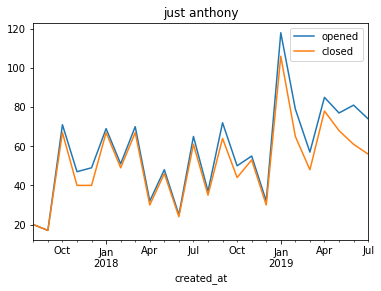

In [63]:
fig, ax = plt.subplots()
ax.set_title("just anthony")
pga[['user.login', 'closed_at']].plot(ax=ax)
ax.legend(['opened', "closed"])

In [64]:
pnoa = psub[~psub['user.login'].str.match('anntzer')]
pnga = pnoa.groupby(pd.Grouper(key='created_at', freq='M')).count() 

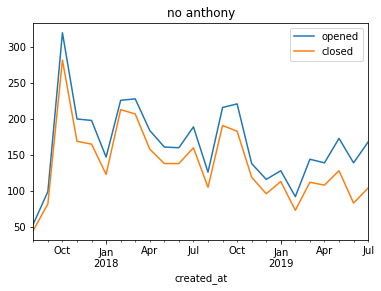

In [66]:
fig, ax = plt.subplots()
ax.set_title("no anthony")
pnga[['user.login', 'closed_at']].plot(ax=ax)
ax.legend(['opened', "closed"])

In [67]:
pnga['user'] = 'everyone else'
pga['user'] = 'anthony'

In [68]:
pgg = pd.concat([pnga, pga])

In [69]:
# count anthony, everyone else
ant = pgg.reset_index().groupby([pd.Grouper(key='created_at', freq='m'),'user']).sum().unstack().fillna(0)

In [70]:
ant.head()

user.login                    id                \
user                         anthony everyone else anthony everyone else   
created_at                                                                 
2017-08-31 00:00:00+00:00         20            54      20            54   
2017-09-30 00:00:00+00:00         17            99      17            99   
2017-10-31 00:00:00+00:00         71           320      71           320   
2017-11-30 00:00:00+00:00         47           200      47           200   
2017-12-31 00:00:00+00:00         49           198      49           198   

                            state               closed_at                \
user                      anthony everyone else   anthony everyone else   
created_at                                                                
2017-08-31 00:00:00+00:00      20            54        20            45   
2017-09-30 00:00:00+00:00      17            99        17            82   
2017-10-31 00:00:00+00:00      71           320        67           282   
2017-11-30 00:00:00+00:00      47           200        40           169   
2017-12-31 00:00:00+00:00      49           198        40           165   

                          author_association               close_rate  \
user                                 anthony everyone else    anthony   
created_at                                                              
2017-08-31 00:00:00+00:00                 20            54         20   
2017-09-30 00:00:00+00:00                 17            99         17   
2017-10-31 00:00:00+00:00                 71           320         67   
2017-11-30 00:00:00+00:00                 47           200         40   
2017-12-31 00:00:00+00:00                 49           198         40   

                                        close_wno_merge_rate                
user                      everyone else              anthony everyone else  
created_at                                                                  
2017-08-31 00:00:00+00:00            45                   20            45  
2017-09-30 00:00:00+00:00            82                   17            82  
2017-10-31 00:00:00+00:00           282                   67           282  
2017-11-30 00:00:00+00:00           169                   40           169  
2017-12-31 00:00:00+00:00           165                   40           165

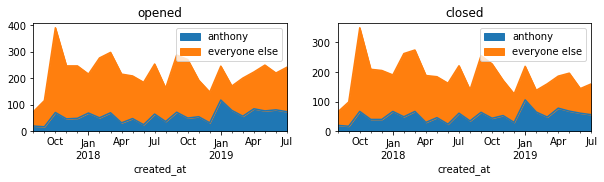

In [71]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,2))
_ = ax1.set_title("opened")
_ = ant['user.login'].plot.area(ax=ax1)
_ = ax1.legend()
_ = ax2.set_title("closed")
_ = ant['closed_at'].plot.area(ax=ax2)
_ = ax2.legend()

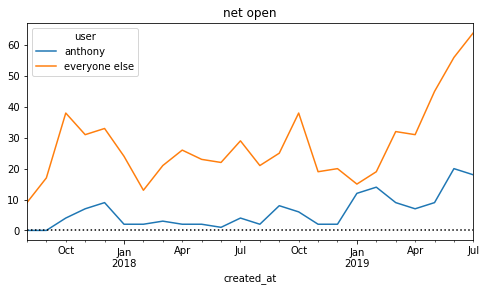

In [72]:
#group nets:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_title('net open')
_ = (ant['user.login']-ant['closed_at']).plot(ax=ax)
_ = ax.axhline(0, color='k', linestyle=":")

# contributor type

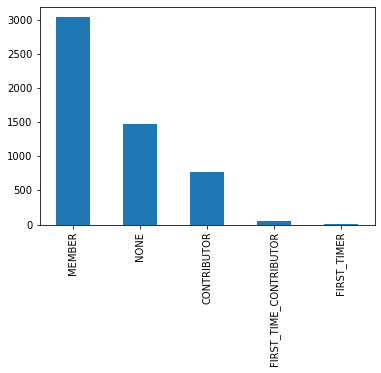

In [73]:
psub['author_association'].value_counts().plot.bar()

In [74]:
nobot = pdf[~pdf['user.login'].str.match('meeseeksmachine')]

In [76]:
psub.groupby('author_association')[['close_rate']].describe().T

author_association              CONTRIBUTOR               FIRST_TIMER  \
close_rate count                        669                        10   
           mean     24 days 16:40:07.201793   63 days 01:06:45.700000   
           std      65 days 07:35:50.834051  117 days 09:32:17.120057   
           min              0 days 00:00:29           0 days 00:16:46   
           25%              0 days 04:45:54           0 days 15:53:34   
           50%              1 days 08:41:17           1 days 18:18:24   
           75%             11 days 03:48:58   34 days 18:39:48.500000   
           max            490 days 21:15:08         312 days 20:35:54   

author_association   FIRST_TIME_CONTRIBUTOR                   MEMBER  \
close_rate count                         12                     2704   
           mean     19 days 09:36:10.416666  21 days 19:06:06.879807   
           std      46 days 01:09:25.582923  62 days 00:51:47.276072   
           min              0 days 00:01:28          0 days 00:00:15   
           25%       0 days 00:32:22.500000   0 days 07:45:55.750000   
           50%       3 days 15:30:38.500000          1 days 12:18:41   
           75%      13 days 06:03:20.750000   9 days 08:49:52.500000   
           max            163 days 01:14:53        647 days 13:26:38   

author_association                     NONE  
close_rate count                       1136  
           mean     26 days 11:30:57.251760  
           std      81 days 18:25:41.427711  
           min              0 days 00:00:07  
           25%       0 days 02:12:03.250000  
           50%       0 days 12:57:28.500000  
           75%       6 days 06:53:52.250000  
           max            589 days 02:32:16

In [77]:
import numpy as np
atype = psub[['author_association','close_rate']].melt(id_vars='author_association',
     value_vars=['close_rate'])
atype['days'] = atype['value'].dt.days
atype['log_days'] = np.log(atype['value'].dt.days)

/home/hannah/miniconda3/envs/mpl/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [78]:
atype.head()

,author_association,variable,value,days,log_days
0,MEMBER,close_rate,NaT,NaN,NaN
1,MEMBER,close_rate,NaT,NaN,NaN
2,MEMBER,close_rate,NaT,NaN,NaN
3,MEMBER,close_rate,1 days 16:01:58,1.0,0.0
4,CONTRIBUTOR,close_rate,0 days 05:20:50,0.0,-inf


# Distribution of days to close PRs by author type

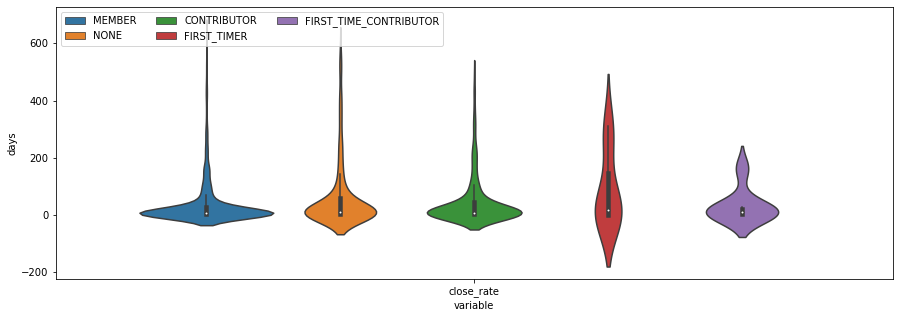

In [80]:
fig, ax = plt.subplots(figsize=(15,5))
_ = sns.violinplot(x='variable', y ='days', hue='author_association', 
                   data=atype[np.isfinite(atype['log_days'])], ax=ax)
_ = ax.legend(ncol=3, loc='upper left')

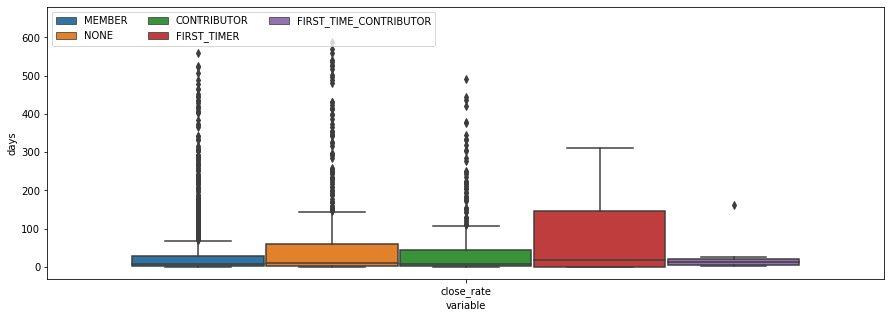

In [82]:
fig, ax = plt.subplots(figsize=(15,5))
_ = sns.boxplot(x='variable', y ='days', hue='author_association', 
                data=atype[np.isfinite(atype['log_days'])], ax=ax)
_ = ax.legend(ncol=3, loc='upper left')

/home/hannah/miniconda3/envs/mpl/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/hannah/miniconda3/envs/mpl/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0.5, 0, 'days opened')

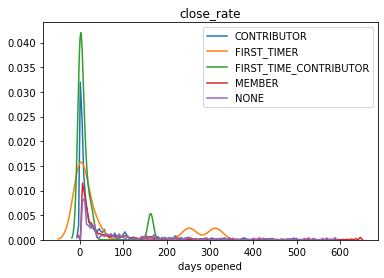

In [98]:
fig, ax = plt.subplots()
ax.set_title(f'{var}')
for group, dfga in atype.groupby('author_association'):
    sns.distplot(dfga['days'], hist=False, label=group, ax=ax)
ax.set_xlabel("days opened")  

In [100]:
import matplotlib.ticker as mticker
@mticker.FuncFormatter
def notlog(x, pos):
    if x <= 0:
        return 10**x
    else:
        return int(10**x)

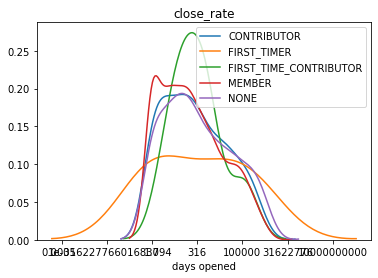

In [101]:
fig, ax = plt.subplots()
ax.set_title(f'{var}')
for group, dfga in atype.groupby('author_association'):
    sns.distplot(dfga['log_days'], hist=False, label=group, ax=ax)
ax.set_xlabel("days opened")  

ax.xaxis.set_major_formatter(notlog)
    

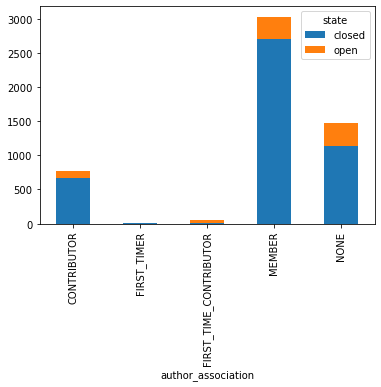

In [110]:
psub.groupby(['author_association', 'state']).count()['created_at'].unstack().plot.bar(stacked=True)

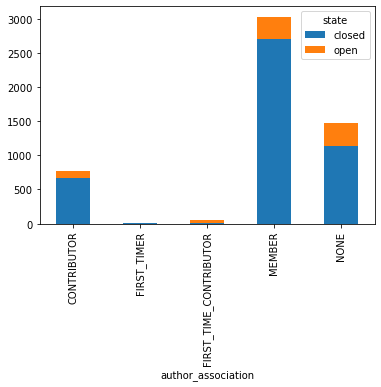

In [125]:
psub.groupby(['author_association', 'state']).count()['created_at'].unstack().plot.bar(stacked=True)

In [168]:
pt = psub.groupby(['author_association', 'state']).count()['created_at'].unstack()
pt['cp'] = pt['closed']/pt.sum(axis=1)
pt['op'] = pt['open']/pt.sum(axis=1)

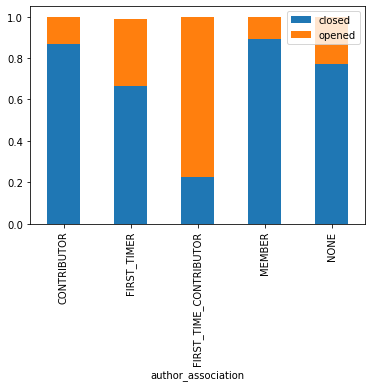

In [172]:
pt[['cp', 'op']].plot.bar(stacked=True)
plt.legend(["closed", 'opened'])

In [174]:
psub.groupby(['author_association', pd.Grouper(key='created_at', freq='m')])['id', 'close_rate'].count().unstack().T.describe()

author_association,CONTRIBUTOR,FIRST_TIMER,FIRST_TIME_CONTRIBUTOR,MEMBER,NONE
count,48.000000,24.000000,38.000000,48.000000,48.000000
mean,30.000000,1.041667,1.710526,119.479167,54.437500
std,14.206681,0.858673,1.675062,33.669223,26.401891
min,7.000000,0.000000,0.000000,46.000000,12.000000
25%,18.500000,1.000000,0.000000,99.750000,36.750000
50%,28.000000,1.000000,1.000000,123.000000,47.500000
75%,37.500000,1.000000,2.750000,145.000000,66.500000
max,70.000000,4.000000,7.000000,176.000000,143.000000


In [175]:
psub.groupby(['author_association', pd.Grouper(key='created_at', freq='m')])['id','closed_at'].count().describe()

,id,closed_at
count,103.000000,103.000000
mean,51.912621,43.990291
std,51.378470,46.472951
min,1.000000,0.000000
25%,4.000000,1.000000
50%,43.000000,29.000000
75%,78.000000,67.000000
max,176.000000,159.000000


In [176]:
psub[psub['created_at']>='2018-07-1'].groupby(['author_association', pd.Grouper(key='created_at', freq='m')])['id','closed_at'].count().describe()

,id,closed_at
count,59.000000,59.000000
mean,48.661017,39.728814
std,51.980305,46.070347
min,1.000000,0.000000
25%,4.000000,1.000000
50%,36.000000,25.000000
75%,64.000000,50.500000
max,171.000000,158.000000


In [183]:
psub[psub['created_at']>='2018'].groupby(['author_association', pd.Grouper(key='created_at', freq='m')])['id','closed_at'].count().describe()

,id,closed_at
count,84.000000,84.000000
mean,50.857143,42.904762
std,51.113421,46.438097
min,1.000000,0.000000
25%,4.000000,1.000000
50%,37.000000,28.000000
75%,76.500000,66.500000
max,171.000000,158.000000
